In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine
from GTGP import GTGP


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [3]:
df = pd.read_csv("../data/fars.tsv",delimiter='\t')
X = df.iloc[:,:-1].to_numpy().astype("float")
y = df.iloc[:,-1].to_numpy().astype("int")

seeds = [10086, 200,500,30506,30405,30420,10056,7059,40965,5398,869543,83491,823190,
         48392,2810,48392,3498210,483902,859032,12890,538920,86954,54309,6504,9840,
         219805,548,2981,432890,5438908,219094,5843902,60854,979,12890,2108,4093]
train_size = 0.7
dataset = 'fars'

In [4]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

# model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0.001

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
11 33 4
14 42 5
17 51 6
20 60 7
23 69 8
26 78 9
27 81 10
30 90 11
32 96 12
34 102 13
36 108 14
37 111 15
40 120 16
42 126 17
44 132 18
47 141 19
48 144 20
51 153 21
54 162 22
56 168 23
58 174 24
59 177 25
60 180 26
62 186 27
64 192 28
66 198 29
68 204 30
69 207 31
72 216 32
74 222 33
77 231 34
79 237 35
82 246 36
84 252 37
86 258 38
89 267 39
90 270 40
91 273 41
93 279 42
96 288 43
98 294 44
101 303 45
102 306 46
104 312 47
106 318 48
107 321 49
109 327 50
111 333 51
114 342 52
116 348 53
117 351 54
118 354 55
120 360 56
122 366 57
124 372 58
126 378 59
127 381 60
130 390 61
133 399 62
135 405 63
136 408 64
137 411 65
139 417 66
142 426 67
145 435 68
147 441 69
147 441 70
148 444 71
150 450 72
152 456 73
155 465 74
156 468 75
157 471 76
158 474 77
160 480 78
162 486 79
164 492 80
164 492 81
165 495 82
167 501 83
170 510 84
171 513 85
172 516 86
175 525 87
175 525 88
175 525 89
177 531 90
178 534 91
179 537 92
180 540 93
181 543 94
181 543 95
182 546 96
184 552 97
18

([0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745857917002702,
  0.5745857917002702,
  0.5743594097089576,
  0.5744726007046139,
  0.5744726007046139,
  0.5744726007046139,
  0.5744726007046139,
  0.5744726007046139,
  0.5743594097089576,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743594097089576,
  0.5743452608345007,
  0.5743311119600436,
  0.5743169630855866,
  0.5743169630855866,
  0.5743169630855866,
  0.5743169630855866,
  0.5743169630855866,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5743169630855866,
  0.5743169630855866,
  0.5743169630855866,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5743028142111295,
  0.5742745164622154,
  0.5742745164622154,
  0.5742745164622154,
  0.5742745164622154,
  0.5742745164622154,
  0.5742886653366724,
  0.5742745164622154,
  0.5742745164622154,
  0.574274

In [7]:
gtgp_m1 = gtgp

<Axes: >

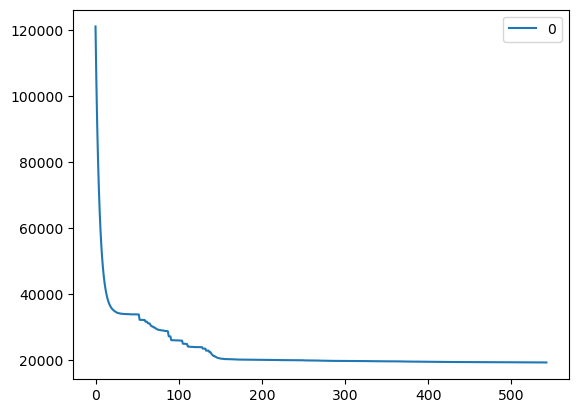

In [8]:
pd.DataFrame(gtgp_m1.train_sse).plot()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,stratify=y, random_state=seeds[0])

learning_rate=0.1
max_depth=1
bins=8
lam=100

gtgp = GTGP(learning_rate=learning_rate,max_depth=max_depth,bins=bins,lam=lam)

total_size=10
elite_size = 3
epoch= 1000
gp_epoch= 1
verbose = 1
tolerance=0

gtgp.fit(X_train,y_train,total_size=total_size,elite_size = elite_size,epoch=epoch,gp_epoch=gp_epoch,tolerance=tolerance,verbose=verbose)

retrain_epoch=1
alpha=0
beta=1
gammer=0

verbose=1
gtgp.lam = 1
gtgp.retrain_estimators(X_test,y_test,retrain_epoch=retrain_epoch,alpha=alpha,beta=beta,gammer=gammer,verbose=verbose)

3 9 1
6 18 2
9 27 3
12 36 4
15 45 5
18 54 6
21 63 7
24 72 8
27 81 9
30 90 10
33 99 11
36 108 12
39 117 13
42 126 14
45 135 15
48 144 16
51 153 17
54 162 18
57 171 19
60 180 20
63 189 21
66 198 22
69 207 23
72 216 24
75 225 25
78 234 26
81 243 27
84 252 28
87 261 29
90 270 30
93 279 31
96 288 32
99 297 33
102 306 34
105 315 35
108 324 36
111 333 37
114 342 38
117 351 39
120 360 40
123 369 41
126 378 42
129 387 43
132 396 44
135 405 45
138 414 46
141 423 47
144 432 48
147 441 49
150 450 50
153 459 51
156 468 52
159 477 53
162 486 54
165 495 55
168 504 56
171 513 57
174 522 58
177 531 59
180 540 60
183 549 61
186 558 62
189 567 63
192 576 64
195 585 65
198 594 66
201 603 67
204 612 68
207 621 69
210 630 70
213 639 71
216 648 72
219 657 73
222 666 74
225 675 75
228 684 76
231 693 77
234 702 78
237 711 79
240 720 80
243 729 81
246 738 82
249 747 83
252 756 84
255 765 85
258 774 86
261 783 87
264 792 88
267 801 89
270 810 90
273 819 91
276 828 92
279 837 93
282 846 94
285 855 95
288 864 96
2

([0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745716428258132,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5745857917002702,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.5743452608345007,
  0.574345

In [10]:
gtgp_m2 = gtgp

<Axes: >

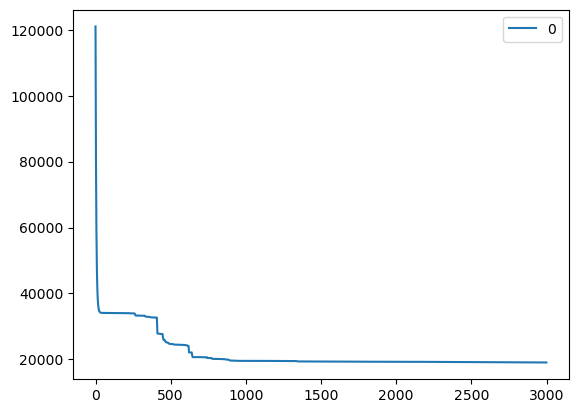

In [11]:
pd.DataFrame(gtgp_m2.train_sse).plot()

# comparison

In [12]:
gtgp_m1.print_model()
print()
print("train acc",gtgp_m1.train_acc[-1])
print("train f1",gtgp_m1.train_f1_score[-1])
print("test acc",gtgp_m1.test_acc[-1])
print("test f1",gtgp_m1.test_f1_score[-1])
gtgp_m2.print_model()
print()
print("train acc",gtgp_m2.train_acc[-1])
print("train f1",gtgp_m2.train_f1_score[-1])
print("test acc",gtgp_m2.test_acc[-1])
print("test f1",gtgp_m2.test_f1_score[-1])

----------------GTGP-------------
Number of Trees: 543
Average of depth: 1.0
Number of nodes: 1629

train acc 0.7855455098546911
train f1 0.448004996930556
test acc 0.7853817965732396
test f1 0.4459000116323305
----------------GTGP-------------
Number of Trees: 3000
Average of depth: 1.0
Number of nodes: 9000

train acc 0.790101447429857
train f1 0.5109092420222735
test acc 0.790333762503714
test f1 0.5082981453197899


In [13]:
gtgp_m1.train_acc[-1],gtgp_m1.train_f1_score[-1],gtgp_m2.train_acc[-1],gtgp_m2.train_f1_score[-1]

(0.7855455098546911, 0.448004996930556, 0.790101447429857, 0.5109092420222735)

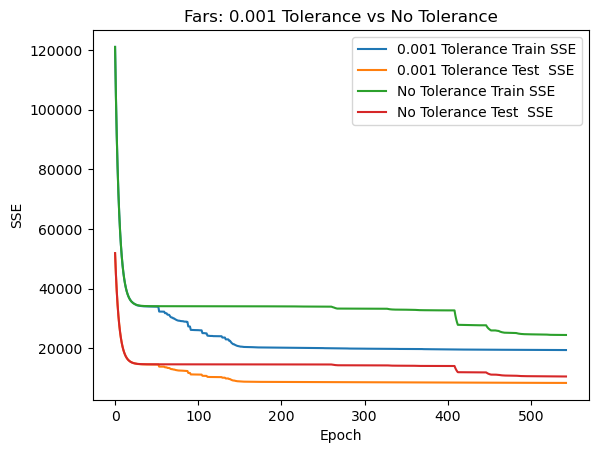

In [21]:
m1_train_sse = np.array(gtgp_m1.train_sse)
m2_train_sse = np.array(gtgp_m2.train_sse)[:m1_train_sse.shape[0]]

m1_test_sse = np.array(gtgp_m1.test_sse)
m2_test_sse = np.array(gtgp_m2.test_sse)[:m1_train_sse.shape[0]]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)
plt.ylabel("SSE")
plt.xlabel("Epoch")
plt.title("Fars: 0.001 Tolerance vs No Tolerance")
plt.legend(["0.001 Tolerance Train SSE","0.001 Tolerance Test  SSE","No Tolerance Train SSE","No Tolerance Test  SSE"])

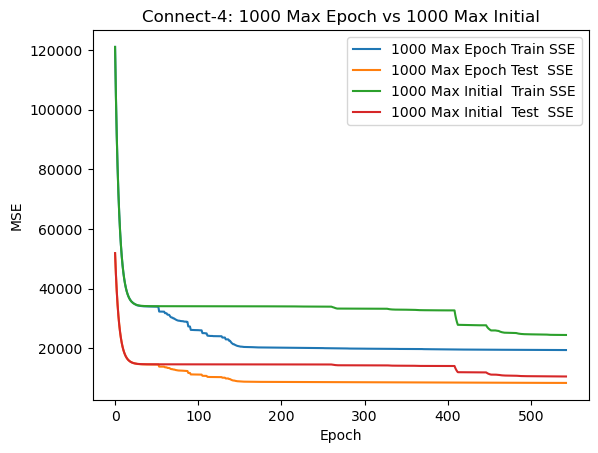

In [19]:
m1_train_sse = np.array(gtgp_m1.train_sse)
m2_train_sse = np.array(gtgp_m2.train_sse)[:m1_train_sse.shape[0]]

m1_test_sse = np.array(gtgp_m1.test_sse)
m2_test_sse = np.array(gtgp_m2.test_sse)[:m1_train_sse.shape[0]]

plt.plot(m1_train_sse)
plt.plot(m1_test_sse)
plt.plot(m2_train_sse)
plt.plot(m2_test_sse)

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.title("Connect-4: 1000 Max Epoch vs 1000 Max Initial")
plt.legend(["1000 Max Epoch Train SSE","1000 Max Epoch Test  SSE","1000 Max Initial  Train SSE","1000 Max Initial  Test  SSE"])